<hr />

## Tutorial on Decision trees

<hr />

# Decision trees

1. Regression
2. Classification

In [1]:
#importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Decision tree for classification

<hr />

### Entropy as an impurity measure

<hr />

In [2]:
def calc_entropy(p):
    
    if p!= 0:
        return -p * np.log2(p)

    else:
        return 0


### Binary classification problem

Two classes:
1. Positive class
2. Negative class

## Case 1: p = 0.5  q = 0.5

In [3]:
P = [0.5,0.5]
H = np.sum([calc_entropy(prob) for prob in P])

In [4]:
print("Entropy: ", H)

Entropy:  1.0


## Case 2: p = 1  q = 0

In [5]:
P = [1,0]
H = np.sum([calc_entropy(prob) for prob in P])

In [6]:
print("Entropy: ", H)

Entropy:  0.0


## Case 3: p = 0.3  q = 0.7

In [7]:
P = [0.3,0.7]
H = np.sum([calc_entropy(prob) for prob in P])

In [8]:
print("Entropy: ", H)

Entropy:  0.8812908992306927


## Plotting entropy for Bernoulli RV

In [9]:
x = np.arange(0, 1.01, 0.01)
entropy = [calc_entropy(prob) + calc_entropy((1-prob)) for prob in x]

Text(0, 0.5, 'Entropy')

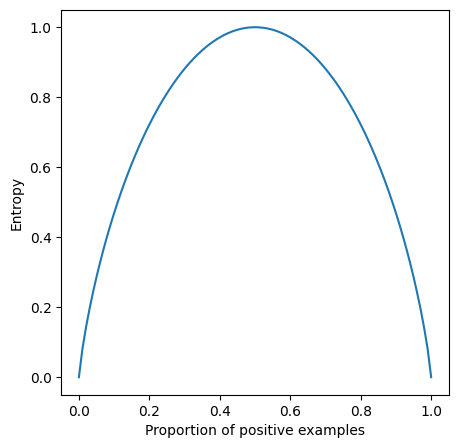

In [10]:
plt.figure(figsize=(5,5))
plt.plot(x , entropy)
plt.xlabel("Proportion of positive examples")
plt.ylabel("Entropy")

<hr />

### Gini as an impurity measure

<hr />

In [11]:
def calc_gini(p):
    
    if p!= 0:
        return 1 - p**2 - (1-p)**2

    else:
        return 0

## Case 1: p = 0.5  q = 0.5

In [12]:
G = calc_gini(0.5) 

In [13]:
print("Gini: ", G)

Gini:  0.5


## Case 2: p = 1  q = 0

In [14]:
G = calc_gini(1) 

In [15]:
print("Gini: ", G)

Gini:  0


## Case 3: p = 0.3  q = 0.7

In [16]:
G = calc_gini(0.3) 

In [17]:
print("Gini: ", G)

Gini:  0.4200000000000001


## Plotting Gini for Bernoulli RV

In [18]:
x = np.arange(0, 1.01, 0.01)
gini = [calc_gini(prob) for prob in x]

Text(0, 0.5, 'Gini')

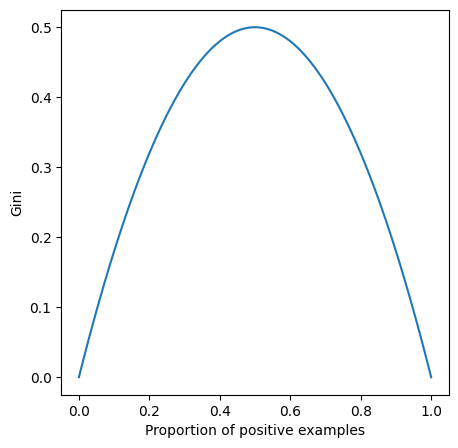

In [19]:
plt.figure(figsize=(5,5))
plt.plot(x , gini)
plt.xlabel("Proportion of positive examples")
plt.ylabel("Gini")

# Lets compare the plots of Gini and Entropy

Text(0, 0.5, 'Impurity measures')

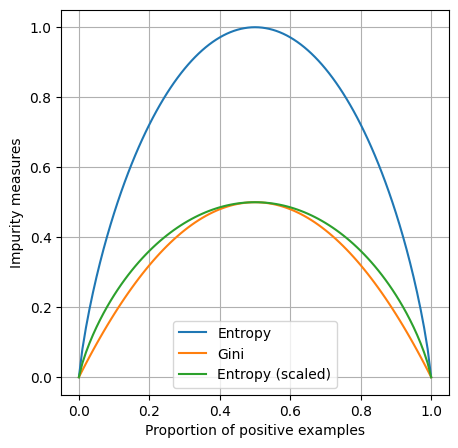

In [20]:
plt.figure(figsize=(5,5))
plt.plot(x , entropy, label = "Entropy")
plt.plot(x , gini, label = "Gini")
entropy_scaled = [x/2 for x in entropy]
plt.plot(x , entropy_scaled, label = "Entropy (scaled)")
plt.legend()
plt.grid()
plt.xlabel("Proportion of positive examples")
plt.ylabel("Impurity measures")

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [22]:
target_names = iris.target_names

In [23]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [24]:
coulmn_names = data.columns.values

In [25]:
features = coulmn_names[0:-1]

In [26]:
features 

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

In [27]:
target = coulmn_names[-1]

In [28]:
target

'target'

In [29]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.333, random_state=42)

In [30]:
train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
96,5.7,2.9,4.2,1.3,1.0
105,7.6,3.0,6.6,2.1,2.0
66,5.6,3.0,4.5,1.5,1.0
0,5.1,3.5,1.4,0.2,0.0
122,7.7,2.8,6.7,2.0,2.0


In [31]:
len(train)

100

In [32]:
len(test)

50

# Sampling with and without replacement

In [33]:
def sampling_without_replacement(data, weights, num_of_samples, seed):
    sample = data.sample(num_of_samples, replace = False, weights = weights, random_state=seed)
    return sample.reset_index(drop=True)

In [34]:
def sampling_with_replacement(data, weights, num_of_samples, seed):
    sample = data.sample(num_of_samples, replace = True, weights = weights, random_state=seed)
    return sample.reset_index(drop=True)

In [35]:
sample_with_replacement = sampling_with_replacement(data=train, weights=None, num_of_samples=100, seed=1)

In [36]:
sample_without_replacement = sampling_without_replacement(data=train, weights=None, num_of_samples=100, seed=1)

In [37]:
sample_with_replacement.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.0,3.4,1.5,0.2,0.0
1,5.0,3.0,1.6,0.2,0.0
2,6.6,2.9,4.6,1.3,1.0
3,5.0,2.0,3.5,1.0,1.0
4,5.6,3.0,4.1,1.3,1.0


In [38]:
sample_without_replacement.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,6.7,3.3,5.7,2.5,2.0
1,4.9,3.0,1.4,0.2,0.0
2,5.5,2.4,3.8,1.1,1.0
3,7.2,3.0,5.8,1.6,2.0
4,5.9,3.0,5.1,1.8,2.0


# Fitting a decision tree classifier

In [39]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [40]:
model = DecisionTreeClassifier()
model.fit(sample_with_replacement[features],sample_with_replacement[target])

DecisionTreeClassifier()

In [41]:
y_pred = model.predict(test[features])

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
report = classification_report(y_pred, test[target])
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       0.87      0.93      0.90        14
         2.0       0.94      0.88      0.91        17

    accuracy                           0.94        50
   macro avg       0.93      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



In [44]:
confusion_matrix(y_pred, test[target])

array([[19,  0,  0],
       [ 0, 13,  1],
       [ 0,  2, 15]])

# Visualizing the fitted Tree

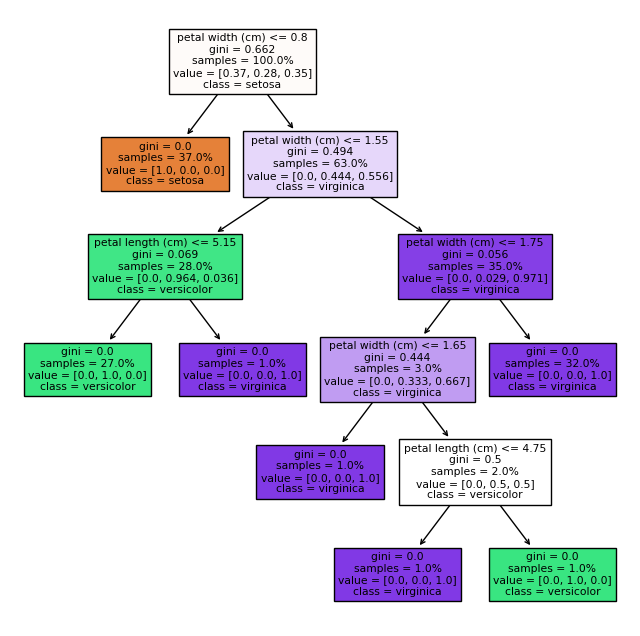

In [45]:
from sklearn import tree
plt.rcParams['figure.figsize'] = (8, 8)

tree.plot_tree(model, filled=True, feature_names=features, class_names=target_names, proportion=True);

In [46]:
model = DecisionTreeClassifier(criterion= "entropy")
model.fit(sample_with_replacement[features],sample_with_replacement[target])

DecisionTreeClassifier(criterion='entropy')

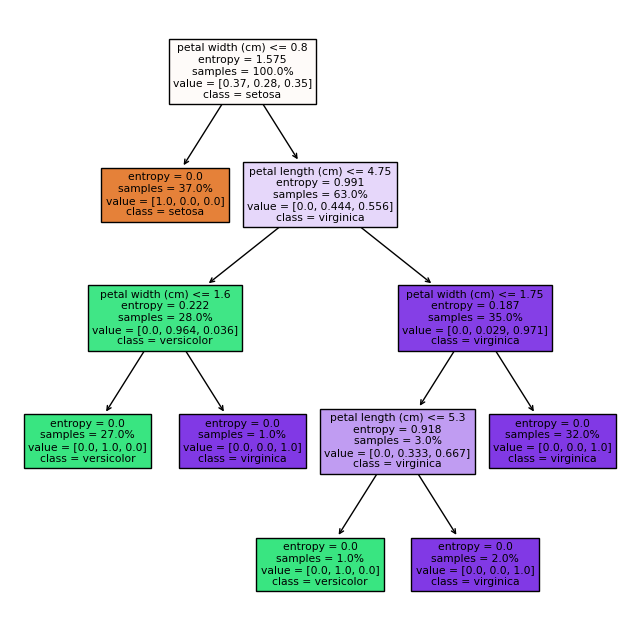

In [47]:
tree.plot_tree(model, filled=True, feature_names=features, class_names=target_names, proportion=True);

class sklearn.tree.DecisionTreeClassifier(fitted_model, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

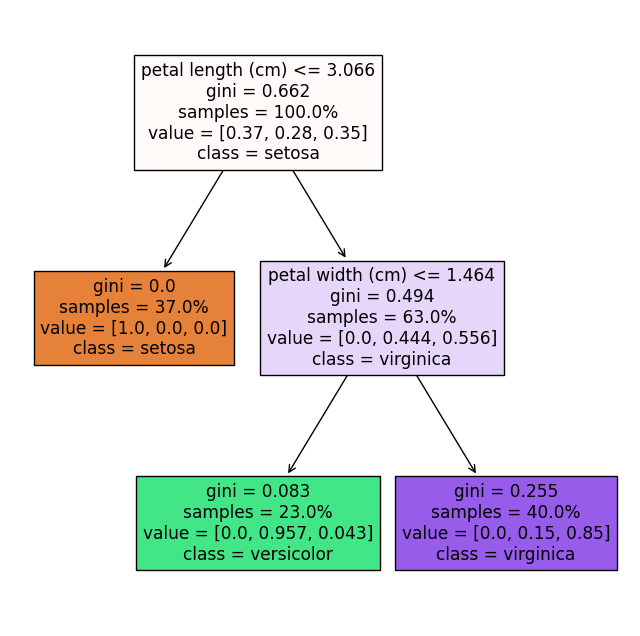

In [48]:
model = DecisionTreeClassifier(max_depth=2, splitter="random")
model.fit(sample_with_replacement[features],sample_with_replacement[target])
tree.plot_tree(model, filled=True, feature_names=features, class_names=target_names, proportion=True);

<hr />

# Pruning the trees

<hr />

# Pre-pruning or early stopping: Using minimum impurity decrease

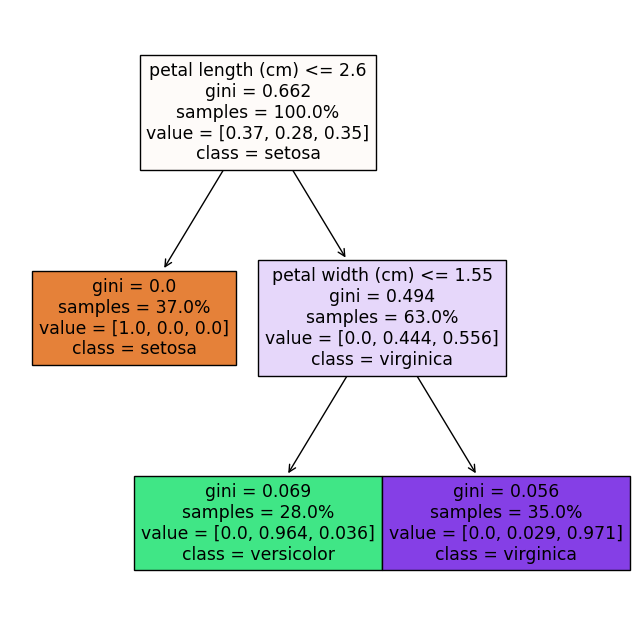

In [49]:
model = DecisionTreeClassifier(splitter="best", min_impurity_decrease=0.05)
model.fit(sample_with_replacement[features],sample_with_replacement[target])
tree.plot_tree(model, filled=True, feature_names=features, class_names=target_names, proportion=True);

# Post Pruning: cost complexity pruning

https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

Depth of the fitted decision tree:  4


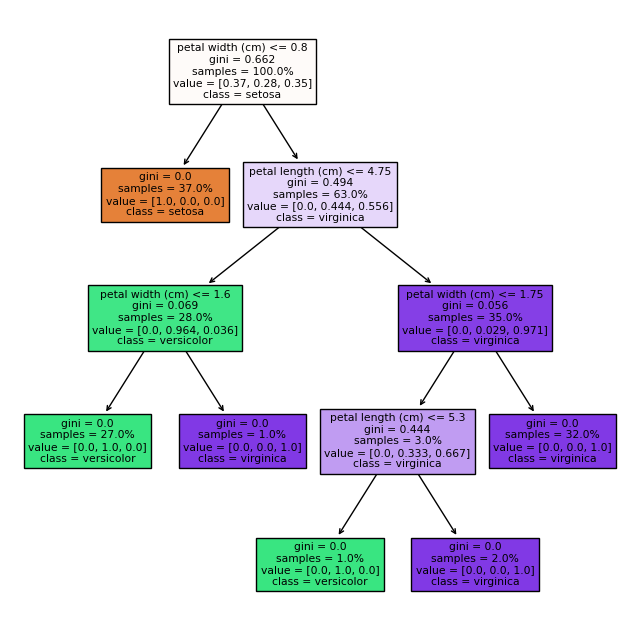

In [50]:
model = DecisionTreeClassifier(splitter="best")
model.fit(sample_with_replacement[features], sample_with_replacement[target])
tree.plot_tree(model, filled=True, feature_names=features, class_names=target_names, proportion=True);

print("Depth of the fitted decision tree: ", model.tree_.max_depth)

path = model.cost_complexity_pruning_path(sample_with_replacement[features], sample_with_replacement[target])
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [51]:
ccp_alphas

array([0.        , 0.00647619, 0.01928571, 0.27239683, 0.35108889])

In [52]:
impurities

array([0.        , 0.01942857, 0.03871429, 0.31111111, 0.6622    ])

The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree with one node.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

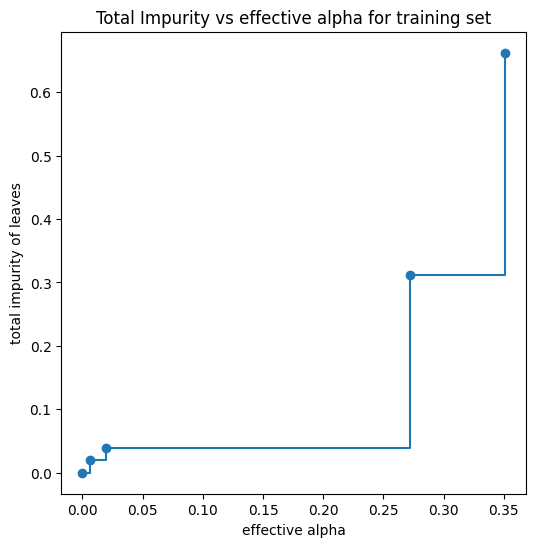

In [53]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ccp_alphas, impurities, marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

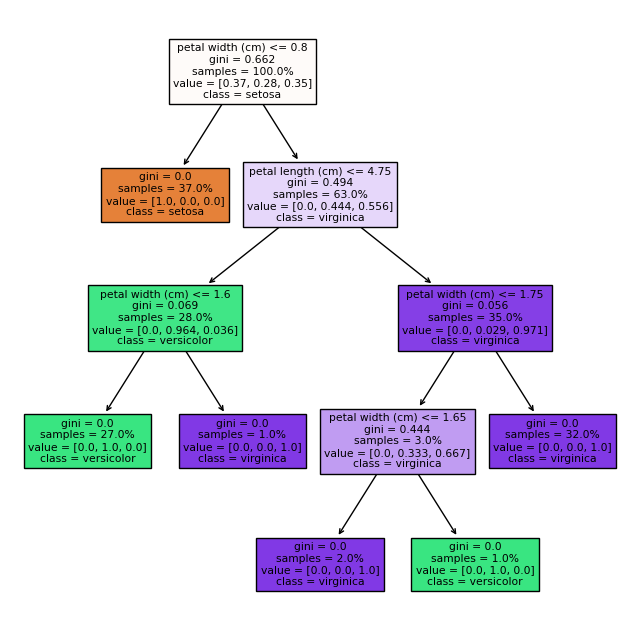

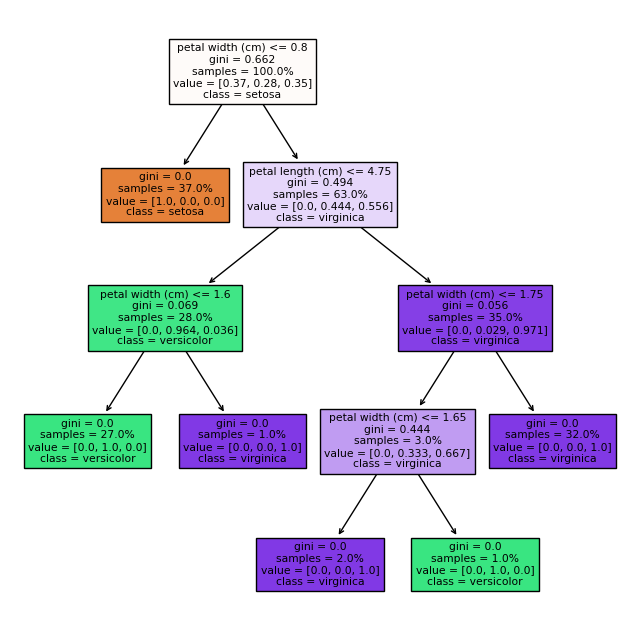

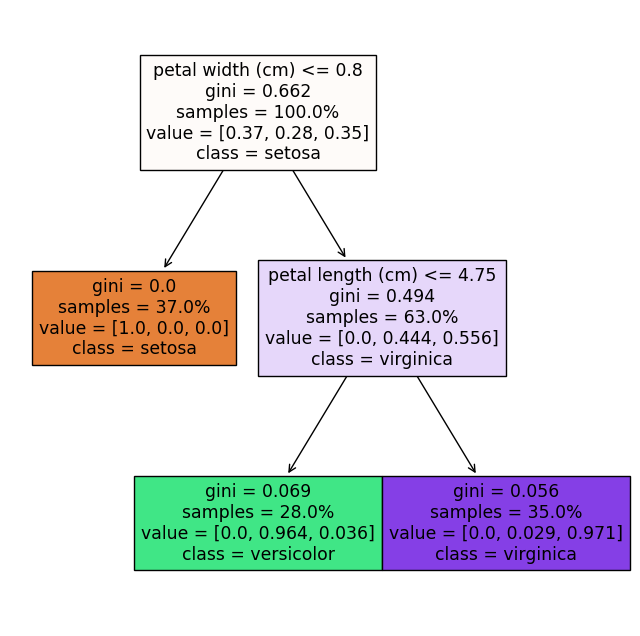

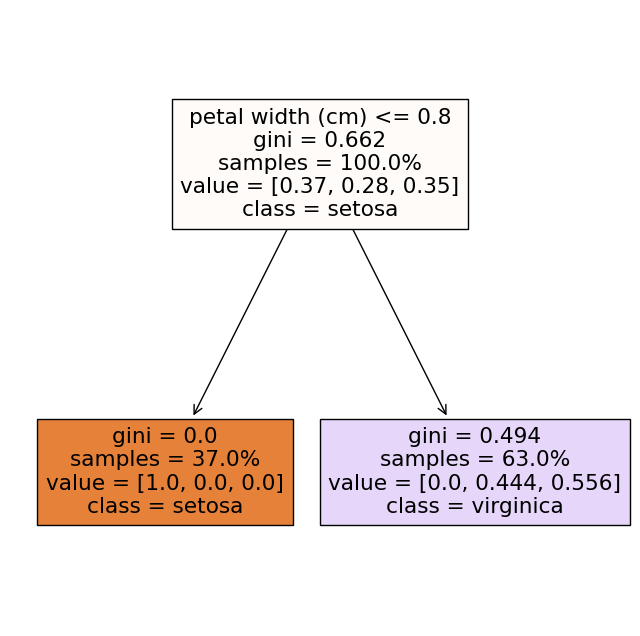

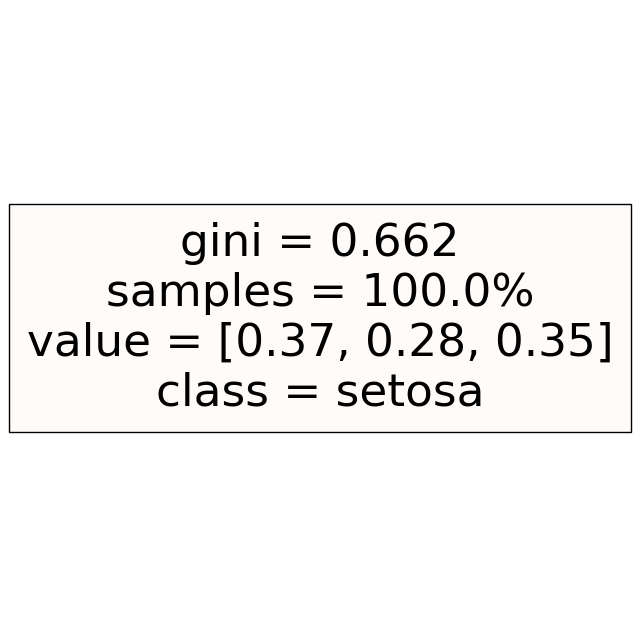

In [54]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(sample_with_replacement[features], sample_with_replacement[target])
    clfs.append(clf)
    tree.plot_tree(clf, filled=True, feature_names=features, class_names=target_names, proportion=True);
    plt.show()

# Decision Path 

/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


  (0, 0)	1
  (0, 2)	1
  (0, 3)	1
  (0, 5)	1


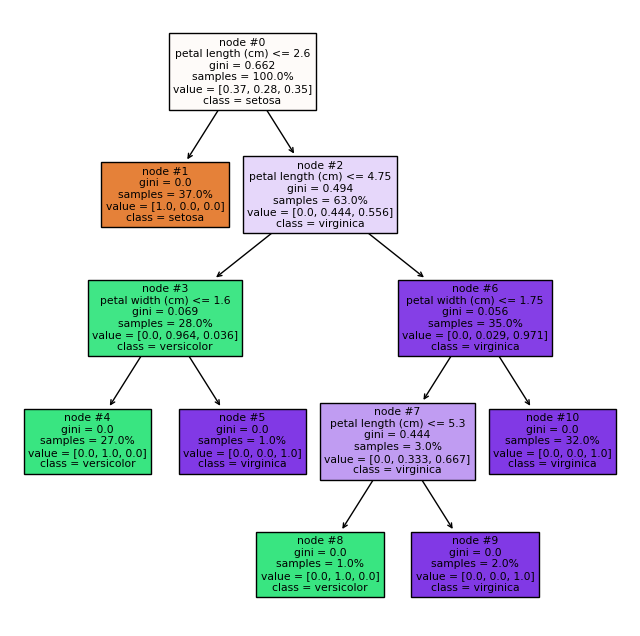

In [55]:
model = DecisionTreeClassifier(splitter="best")
model.fit(sample_with_replacement[features], sample_with_replacement[target])
tree.plot_tree(model, filled=True, feature_names=features, class_names=target_names, proportion=True, node_ids= True);
print(model.decision_path(np.array([[5.1, 3.5, 3.2, 2.7]]).reshape(-1,4)))

# Decision Boundary Plotting

/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


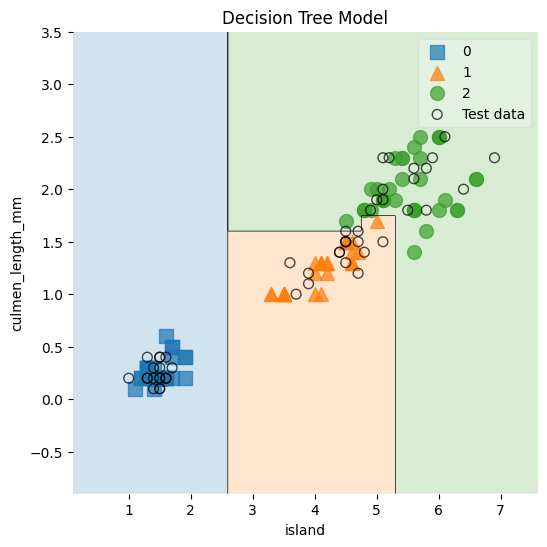

In [56]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(6,6))

scatter_kwargs = {'s': 100, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7}
                                
fig = plot_decision_regions(X = sample_with_replacement[features].values, y = sample_with_replacement[target].astype(int).values, 
                                feature_index=[2,3], 
                                filler_feature_values={0: 5, 1: 3},
                                filler_feature_ranges={0: 10, 1:10}, clf=model,
                                scatter_kwargs=scatter_kwargs,
                                contourf_kwargs=contourf_kwargs,
                                scatter_highlight_kwargs=scatter_highlight_kwargs,
                                X_highlight=test[features].values)

plt.xlabel("island")
plt.ylabel("culmen_length_mm")
plt.title("Decision Tree Model")
plt.show()

# Why different tree structure for different runs even if we set splitter = "best" ?

### class sklearn.tree.DecisionTreeClassifier(random_state=None) 

Controls the randomness of the estimator. 
The features are always randomly permuted at each split, even if splitter is set to "best". 

When max_features < n_features, the algorithm will select max_features at random at each split before finding the best split among them. 

But the best found split may vary across different runs, even if max_features=n_features. 

That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. 

To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer. 

# Feature Importances

# Feature importance based on mean decrease in impurity

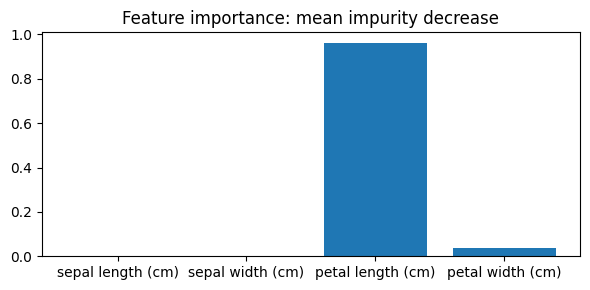

In [57]:
importances = model.feature_importances_
plt.figure(figsize = (6,3))
plt.bar(features , importances)
plt.title("Feature importance: mean impurity decrease")
plt.tight_layout()

# Feature importance based on feature permutation

In [58]:
from sklearn.inspection import permutation_importance

In [59]:
importances = permutation_importance(model, sample_with_replacement[features], sample_with_replacement[target], n_repeats=10, random_state=42, n_jobs=2
)

print(importances)

{'importances_mean': array([0.   , 0.   , 0.557, 0.173]), 'importances_std': array([0.       , 0.       , 0.0433705, 0.039    ]), 'importances': array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.55, 0.59, 0.6 , 0.46, 0.56, 0.57, 0.61, 0.57, 0.5 , 0.56],
       [0.16, 0.17, 0.23, 0.11, 0.22, 0.2 , 0.17, 0.11, 0.16, 0.2 ]])}


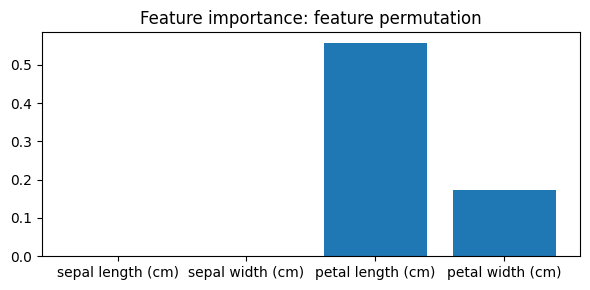

In [60]:
plt.figure(figsize = (6,3))
plt.bar(features , importances['importances_mean'])
plt.title("Feature importance: feature permutation")
plt.tight_layout()